# **CRICKET WORLD CUP PREDICTION**

Dido Fabian Fayed		05111940000059  
Fayha Syifa Qalbi		05111940000185  
Kirana Zea S M			05111940000081 

**TUJUAN**

Tujuan dari program ini adalah untuk memprediksi tim manakah yang memiliki peluang terbesar menjadi juara ICC World Cup 2019

**DATASETS**

Dataset yang digunakan pada program ini adalah:  
* World Cup 2019 Dataset yang berisi riwayat permainan tim pada world cup 
sebelumnya.
* Results yang berisi hasil pertandingan dari tahun 2010 hingga 2017,( Terdapat 996 data pertandingan).
* Fixtures,  
Dataset ini berisi informasi tiap pertandingan tahun 2019, dengan 48 data pertandingan. 
* ICC Rankings,  
Dataset ini berisi rank dan points yang didapatkan tiap tim.(Terdapat 10 tim, yaitu England, India, South Africa, New Zealand, Astralia, Pakistan, Bangladesh, West Indies, Sri Langka, dan Afganistan) 


**WORKFLOW**

Secara garis besar, program akan mengikuti workflow sebagai berikut:  


1.   Data cleaning dan formatting
2.   Exploratory data analysis
3.   Feature engineering dan selection
4.   Membandingkan performance beberapa algoritma classification terhadap model
5.   Mengevaluasi model terbaik pada test set
6.   Interpretasi hasil model
6.   Kesimpulan



**PENJELASAN KODE**

  
Import library yang dibutuhkan

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import files


Load Dataset World Cup 2019 Dataset.csv dan Results.csv

In [6]:

uploaded = files.upload()
uploaded = files.upload()

world_cup = pd.read_csv('World Cup 2019 Dataset.csv')
results = pd.read_csv('results.csv')


Saving World Cup 2019 Dataset.csv to World Cup 2019 Dataset.csv


Saving results.csv to results.csv


In [7]:

world_cup.head(10)


,Team,Group,Previous \r\nappearances,Previous \r\ntitles,Previous\r\n finals,Previous\r\n semifinals,Current \r rank
0,England,A,11,0,3,5,1
1,South Africa,A,6,0,0,4,3
2,West Indies,A,11,2,3,4,8
3,Pakistan,A,11,1,2,6,6
4,New Zealand,A,11,0,1,7,4
5,Sri Lanka,A,11,1,3,4,9
6,Afghanistan,A,1,0,0,0,10
7,Australia,A,11,5,6,7,5
8,Bangladesh,A,5,0,0,0,7
9,India,A,11,2,3,6,2


In [8]:

results.head(10)


,date,Team_1,Team_2,Winner,Margin,Ground
0,4-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
3,8-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka
5,11-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
6,13-Jan-10,India,Sri Lanka,Sri Lanka,4 wickets,Dhaka
7,22-Jan-10,Australia,Pakistan,Australia,5 wickets,Brisbane
8,24-Jan-10,Australia,Pakistan,Australia,140 runs,Sydney
9,26-Jan-10,Australia,Pakistan,Australia,40 runs,Adelaide


**DATA CLEANING DAN FORMATTING**  
  
Pada section ini kita gunakan tim India sebagai contoh.  
Display detail pertandingan tim India

In [9]:

df = results[(results['Team_1'] == 'India') | (results['Team_2'] == 'India')]
india = df.iloc[:]
india.head(10)


,date,Team_1,Team_2,Winner,Margin,Ground
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka
5,11-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
6,13-Jan-10,India,Sri Lanka,Sri Lanka,4 wickets,Dhaka
24,21-Feb-10,India,South Africa,India,1 run,Jaipur
25,24-Feb-10,India,South Africa,India,153 runs,Gwalior
26,27-Feb-10,India,South Africa,South Africa,90 runs,Ahmedabad
44,28-May-10,Zimbabwe,India,Zimbabwe,6 wickets,Bulawayo
46,30-May-10,India,Sri Lanka,India,7 wickets,Bulawayo


Display detail pertandingan yang terjadi pada 2010

In [10]:

df = results[(results['Team_1'] == 'India') | (results['Team_2'] == 'India')]
india = df.iloc[:]
year = []
for row in india['date']:
    year.append(int(row[7:]))
india ['match_year']= year
india_2010 = india[india.match_year >= 10]
india_2010.count()


date          151
Team_1        151
Team_2        151
Winner        151
Margin        142
Ground        151
match_year    151
dtype: int64

**EXPLORATORY DATA ANALYSIS**

Menggabungkan detail tim yang bertanding tahun ini dengan data hasil pertandingan tahun-tahun sebelumnya

In [11]:

worldcup_teams = ['England', ' South Africa', '', 'West Indies', 
            'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 
            'Australia', 'Bangladesh', 'India']
df_teams_1 = results[results['Team_1'].isin(worldcup_teams)]
df_teams_2 = results[results['Team_2'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_1, df_teams_2))
df_teams.drop_duplicates()
df_teams.count()


date      1445
Team_1    1445
Team_2    1445
Winner    1445
Margin    1368
Ground    1445
dtype: int64

In [12]:

df_teams.head(10)


,date,Team_1,Team_2,Winner,Margin,Ground
0,4-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
3,8-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka
5,11-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
6,13-Jan-10,India,Sri Lanka,Sri Lanka,4 wickets,Dhaka
7,22-Jan-10,Australia,Pakistan,Australia,5 wickets,Brisbane
8,24-Jan-10,Australia,Pakistan,Australia,140 runs,Sydney
9,26-Jan-10,Australia,Pakistan,Australia,40 runs,Adelaide


Menghapus kolom yang kurang penting seperti date, margin of victory, dan ground.

In [13]:

df_teams_2010 = df_teams.drop(['date','Margin', 'Ground'], axis=1)
df_teams_2010.head(10)


,Team_1,Team_2,Winner
0,Bangladesh,Sri Lanka,Sri Lanka
1,India,Sri Lanka,Sri Lanka
2,Bangladesh,India,India
3,Bangladesh,Sri Lanka,Sri Lanka
4,India,Sri Lanka,India
5,Bangladesh,India,India
6,India,Sri Lanka,Sri Lanka
7,Australia,Pakistan,Australia
8,Australia,Pakistan,Australia
9,Australia,Pakistan,Australia


**FEATURE ENGINEERING DAN SELECTION**  
Membuat model data dengan ketentuan:  
Jika Team_1 menang, diberi label 1  
Jika Team_2 menang, diberi label 2

In [14]:

df_teams_2010 = df_teams_2010.reset_index(drop=True)
df_teams_2010.loc[df_teams_2010.Winner == df_teams_2010.Team_1,'winning_team']=1
df_teams_2010.loc[df_teams_2010.Winner == df_teams_2010.Team_2, 'winning_team']=2
df_teams_2010 = df_teams_2010.drop(['winning_team'], axis=1)

df_teams_2010.head(10)


,Team_1,Team_2,Winner
0,Bangladesh,Sri Lanka,Sri Lanka
1,India,Sri Lanka,Sri Lanka
2,Bangladesh,India,India
3,Bangladesh,Sri Lanka,Sri Lanka
4,India,Sri Lanka,India
5,Bangladesh,India,India
6,India,Sri Lanka,Sri Lanka
7,Australia,Pakistan,Australia
8,Australia,Pakistan,Australia
9,Australia,Pakistan,Australia


Mengubah Team_1 dan Team_2 dari categorical variable dengan function `pd.get_dummies`. Variable ini akan memiliki value 0 dan 1.

Setelah itu memisahkan X dan Y set, kemudian memisahkan train set dan test set dengan test set sebanyak 30%.

In [15]:

final = pd.get_dummies(df_teams_2010, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

# Memisahkan X dan y sets
X = final.drop(['Winner'], axis=1)
y = final["Winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [16]:

final.head(10)


,Winner,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_Canada,Team_1_England,Team_1_India,Team_1_Ireland,Team_1_Kenya,Team_1_Netherlands,Team_1_New Zealand,Team_1_Pakistan,Team_1_Scotland,Team_1_South Africa,Team_1_Sri Lanka,Team_1_U.A.E.,Team_1_West Indies,Team_1_Zimbabwe,Team_2_Afghanistan,Team_2_Australia,Team_2_Bangladesh,Team_2_Canada,Team_2_England,Team_2_Hong Kong,Team_2_India,Team_2_Ireland,Team_2_Kenya,Team_2_Netherlands,Team_2_New Zealand,Team_2_Pakistan,Team_2_Scotland,Team_2_South Africa,Team_2_Sri Lanka,Team_2_U.A.E.,Team_2_West Indies,Team_2_Zimbabwe
0,Sri Lanka,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Sri Lanka,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,India,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Sri Lanka,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,India,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,India,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,Sri Lanka,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,Australia,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,Australia,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,Australia,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


**MEMBANDINGKAN PERFORMANCE BEBERAPA ALGORITMA CLASSIFICATION TERHADAP MODEL**  
Algoritma Classification yang akan dibandingkan adalah Logistic Regression,  Support Vector Machines, Random Forests, K Nearest Neighbours, dan XGBoost.

**Logistic Regression**

In [17]:

logClassifier = LogisticRegression(random_state = 0)
logClassifier.fit(X_train, y_train)

score = logClassifier.score(X_train, y_train)
score2 = logClassifier.score(X_test, y_test)


print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))


Training set accuracy:  0.691
Test set accuracy:  0.668


Confusion Matrix dari Logistic Regression

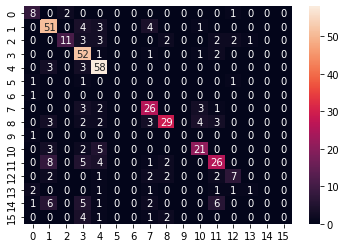

In [18]:

Y_pred = logClassifier.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')


Hasil performance Logistic Regression

In [19]:

print(classification_report(y_test, Y_pred))


              precision    recall  f1-score   support

 Afghanistan       0.57      0.73      0.64        11
   Australia       0.67      0.81      0.73        63
  Bangladesh       0.85      0.46      0.59        24
     England       0.62      0.91      0.74        57
       India       0.71      0.91      0.79        64
     Ireland       0.00      0.00      0.00         3
 Netherlands       0.00      0.00      0.00         1
 New Zealand       0.63      0.74      0.68        35
    Pakistan       0.78      0.63      0.70        46
    Scotland       0.00      0.00      0.00         1
South Africa       0.70      0.68      0.69        31
   Sri Lanka       0.60      0.57      0.58        46
 West Indies       0.58      0.44      0.50        16
    Zimbabwe       0.50      0.14      0.22         7
   no result       0.00      0.00      0.00        21
        tied       0.00      0.00      0.00         8

    accuracy                           0.67       434
   macro avg       0.45   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Support Vector Machines (SVM)**

In [20]:

SVMclassifier = SVC(kernel = 'rbf',random_state = 0)
SVMclassifier.fit(X_train, y_train)

score = SVMclassifier.score(X_train, y_train)
score2 = SVMclassifier.score(X_test, y_test)


print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))


Training set accuracy:  0.696
Test set accuracy:  0.666


Confusion Matrix dari SVM

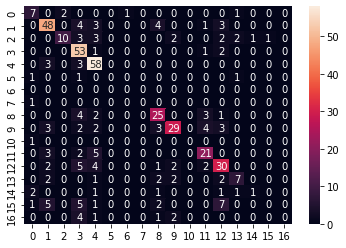

In [21]:

Y_pred = SVMclassifier.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d')


Hasil performance SVM

In [22]:

print(classification_report(y_test, Y_pred))


              precision    recall  f1-score   support

 Afghanistan       0.54      0.64      0.58        11
   Australia       0.73      0.76      0.74        63
  Bangladesh       0.83      0.42      0.56        24
     England       0.62      0.93      0.74        57
       India       0.71      0.91      0.79        64
     Ireland       0.00      0.00      0.00         3
       Kenya       0.00      0.00      0.00         0
 Netherlands       0.00      0.00      0.00         1
 New Zealand       0.64      0.71      0.68        35
    Pakistan       0.78      0.63      0.70        46
    Scotland       0.00      0.00      0.00         1
South Africa       0.66      0.68      0.67        31
   Sri Lanka       0.59      0.65      0.62        46
 West Indies       0.58      0.44      0.50        16
    Zimbabwe       0.50      0.14      0.22         7
   no result       0.00      0.00      0.00        21
        tied       0.00      0.00      0.00         8

    accuracy              

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

**Random Forest**

In [23]:

rf = RandomForestClassifier(n_estimators=100, max_depth=20,
                              random_state=0)
rf.fit(X_train, y_train) 


score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)


print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))


Training set accuracy:  0.700
Test set accuracy:  0.675


Confusion Matrix dari Random Forest

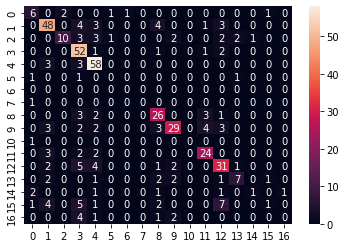

In [24]:

Y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d')


Hasil performance Random Forest

In [25]:

print(classification_report(y_test, Y_pred))


              precision    recall  f1-score   support

 Afghanistan       0.50      0.55      0.52        11
   Australia       0.74      0.76      0.75        63
  Bangladesh       0.83      0.42      0.56        24
     England       0.62      0.91      0.74        57
       India       0.73      0.91      0.81        64
     Ireland       0.00      0.00      0.00         3
       Kenya       0.00      0.00      0.00         0
 Netherlands       0.00      0.00      0.00         1
 New Zealand       0.63      0.74      0.68        35
    Pakistan       0.78      0.63      0.70        46
    Scotland       0.00      0.00      0.00         1
South Africa       0.73      0.77      0.75        31
   Sri Lanka       0.61      0.67      0.64        46
 West Indies       0.64      0.44      0.52        16
    Zimbabwe       0.50      0.14      0.22         7
   no result       0.33      0.05      0.08        21
        tied       0.00      0.00      0.00         8

    accuracy              

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

**K Nearest Neighbor (KNN)**

In [26]:

KNNclassifier = KNeighborsClassifier(n_neighbors = 3)
KNNclassifier.fit(X_train, y_train)

score = KNNclassifier.score(X_train, y_train)
score2 = KNNclassifier.score(X_test, y_test)


print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))


Training set accuracy:  0.662
Test set accuracy:  0.601


Confusion Matrix dari KNN

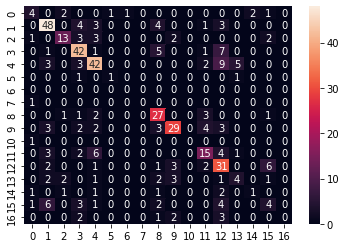

In [27]:

Y_pred = KNNclassifier.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d')


Hasil performance KNN

In [28]:

print(classification_report(y_test, Y_pred))


              precision    recall  f1-score   support

 Afghanistan       0.44      0.36      0.40        11
   Australia       0.71      0.76      0.73        63
  Bangladesh       0.68      0.54      0.60        24
     England       0.67      0.74      0.70        57
       India       0.67      0.66      0.66        64
     Ireland       0.50      0.33      0.40         3
       Kenya       0.00      0.00      0.00         0
 Netherlands       0.00      0.00      0.00         1
 New Zealand       0.59      0.77      0.67        35
    Pakistan       0.74      0.63      0.68        46
    Scotland       0.00      0.00      0.00         1
South Africa       0.54      0.48      0.51        31
   Sri Lanka       0.46      0.67      0.55        46
 West Indies       0.36      0.25      0.30        16
    Zimbabwe       0.33      0.14      0.20         7
   no result       0.27      0.19      0.22        21
        tied       0.00      0.00      0.00         8

    accuracy              

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

**XGBoost**

In [29]:

xgbclassifier = XGBClassifier(seed=82)
xgbclassifier.fit(X_train, y_train)

score = xgbclassifier.score(X_train, y_train)
score2 = xgbclassifier.score(X_test, y_test)


print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))


Training set accuracy:  0.695
Test set accuracy:  0.671


Confusion Matrix dari XGBoost

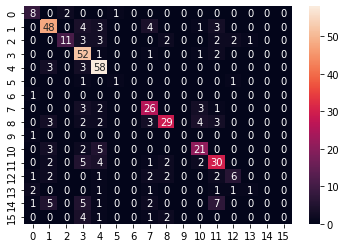

In [30]:

Y_pred = xgbclassifier.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d')


Hasil performance XGBoost

In [31]:

print(classification_report(y_test, Y_pred))


              precision    recall  f1-score   support

 Afghanistan       0.57      0.73      0.64        11
   Australia       0.73      0.76      0.74        63
  Bangladesh       0.85      0.46      0.59        24
     England       0.62      0.91      0.74        57
       India       0.71      0.91      0.79        64
     Ireland       0.50      0.33      0.40         3
 Netherlands       0.00      0.00      0.00         1
 New Zealand       0.63      0.74      0.68        35
    Pakistan       0.78      0.63      0.70        46
    Scotland       0.00      0.00      0.00         1
South Africa       0.66      0.68      0.67        31
   Sri Lanka       0.59      0.65      0.62        46
 West Indies       0.60      0.38      0.46        16
    Zimbabwe       0.50      0.14      0.22         7
   no result       0.00      0.00      0.00        21
        tied       0.00      0.00      0.00         8

    accuracy                           0.67       434
   macro avg       0.48   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dari semua algoritma classifier, Random Forest memiliki accuracy tertinggi, yaitu 70% untuk training set dan 67.5% untuk test set.

**MENGEVALUASI MODEL TERBAIK KE TEST SET**  
Menambahkan data ICC Ranking sehingga tim yang memiliki posisi teratas pada ICC Ranking memiliki peluang lebih besar untuk menang pada pertandingan. Tim tersebut akan dimasukkan ke kolom Team_1.



In [32]:

# Load datasets
uploaded = files.upload()
uploaded = files.upload()

ranking = pd.read_csv('icc_rankings.csv') 
fixtures = pd.read_csv('fixtures.csv')


Saving icc_rankings.csv to icc_rankings.csv


Saving fixtures.csv to fixtures.csv


In [33]:

ranking.head(10)


,Position,Team,Points
0,1,England,125
1,2,India,121
2,3,South Africa,115
3,4,New Zealand,113
4,5,Australia,109
5,6,Pakistan,94
6,7,Bangladesh,90
7,8,West Indies,77
8,9,Sri Lanka,76
9,10,Afghanistan,63


In [34]:

fixtures.head(10)


,Round Number,Date,Location,Team_1,Team_2,Group,Result
0,1,30/05/2019,"Kennington Oval, London",England,South Africa,Group A,NaN
1,1,31/05/2019,"Trent Bridge, Nottingham",West Indies,Pakistan,Group A,NaN
2,1,1/6/2019,"Sophia Gardens, Cardiff",New Zealand,Sri Lanka,Group A,NaN
3,1,1/6/2019,"County Ground, Bristol",Afghanistan,Australia,Group A,NaN
4,1,2/6/2019,"Kennington Oval, London",South Africa,Bangladesh,Group A,NaN
5,1,3/6/2019,"Trent Bridge, Nottingham",England,Pakistan,Group A,NaN
6,1,4/6/2019,"Sophia Gardens, Cardiff",Afghanistan,Sri Lanka,Group A,NaN
7,1,5/6/2019,"The Rose Bowl, Southampton",South Africa,India,Group A,NaN
8,1,5/6/2019,"Kennington Oval, London",Bangladesh,New Zealand,Group A,NaN
9,1,6/6/2019,"Trent Bridge, Nottingham",Australia,West Indies,Group A,NaN


Menambahkan kolom baru dengan rank position untuk tiap tim dan memotong 45 data pertama karena akan mengambil 45 pertandingan stage group.

In [35]:

fixtures.insert(1, 'first_position', fixtures['Team_1'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Team_2'].map(ranking.set_index('Team')['Position']))

fixtures = fixtures.iloc[:45, :]
fixtures.tail()


,Round Number,first_position,second_position,Date,Location,Team_1,Team_2,Group,Result
40,1,1.0,4.0,3/7/2019,"Riverside Ground, Chester-le-Street",England,New Zealand,Group A,NaN
41,1,10.0,8.0,4/7/2019,"Headingley, Leeds",Afghanistan,West Indies,Group A,NaN
42,1,6.0,7.0,5/7/2019,"Lord's, London",Pakistan,Bangladesh,Group A,NaN
43,1,9.0,2.0,6/7/2019,"Headingley, Leeds",Sri Lanka,India,Group A,NaN
44,1,5.0,3.0,6/7/2019,"Emirates Old Trafford, Manchester",Australia,South Africa,Group A,NaN


Looping untuk menambahkan tim ke `pred_set` berdasarkan posisi rank tiap tim.

In [36]:

# List untuk menyimpan data prediksi
pred_set = []

for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2'], 'winning_team': None})
    else:
        pred_set.append({'Team_1': row['Team_2'], 'Team_2': row['Team_1'], 'winning_team': None})

# Convert list ke DataFrame        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set
pred_set.head(10)


,Team_1,Team_2,winning_team
0,England,South Africa,None
1,Pakistan,West Indies,None
2,New Zealand,Sri Lanka,None
3,Australia,Afghanistan,None
4,South Africa,Bangladesh,None
5,England,Pakistan,None
6,Sri Lanka,Afghanistan,None
7,India,South Africa,None
8,New Zealand,Bangladesh,None
9,Australia,West Indies,None


Mengubah Team_1 dan Team_2 menjadi dummy variable dengan function `pd.get_dummies`, sehingga akan memiliki value 0 dan 1.

Kolom yang hilang diisi berdasarkan training model `final`.

Lalu drop kolom winning_team.




In [37]:

pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]


pred_set = pred_set.drop(['Winner'], axis=1)
pred_set.head(10)


,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_Canada,Team_1_England,Team_1_India,Team_1_Ireland,Team_1_Kenya,Team_1_Netherlands,Team_1_New Zealand,Team_1_Pakistan,Team_1_Scotland,Team_1_South Africa,Team_1_Sri Lanka,Team_1_U.A.E.,Team_1_West Indies,Team_1_Zimbabwe,Team_2_Afghanistan,Team_2_Australia,Team_2_Bangladesh,Team_2_Canada,Team_2_England,Team_2_Hong Kong,Team_2_India,Team_2_Ireland,Team_2_Kenya,Team_2_Netherlands,Team_2_New Zealand,Team_2_Pakistan,Team_2_Scotland,Team_2_South Africa,Team_2_Sri Lanka,Team_2_U.A.E.,Team_2_West Indies,Team_2_Zimbabwe
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


**INTERPRETASI HASIL MODEL**  

Mencari hasil dari tiap pertandingan stage group

In [38]:

predictions = rf.predict(pred_set)
for i in range(fixtures.shape[0]):
    # Print Tim 1 dan Tim 2 yang bertanding
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    # Jika Tim 1 menang (label 1), maka print dan sebaliknya
    if predictions[i] == 1:
        print("Winner: " + backup_pred_set.iloc[i, 1])
    
    else:
        print("Winner: " + backup_pred_set.iloc[i, 0])
    print("")


South Africa and England
Winner: England

West Indies and Pakistan
Winner: Pakistan

Sri Lanka and New Zealand
Winner: New Zealand

Afghanistan and Australia
Winner: Australia

Bangladesh and South Africa
Winner: South Africa

Pakistan and England
Winner: England

Afghanistan and Sri Lanka
Winner: Sri Lanka

South Africa and India
Winner: India

Bangladesh and New Zealand
Winner: New Zealand

West Indies and Australia
Winner: Australia

Sri Lanka and Pakistan
Winner: Pakistan

Bangladesh and England
Winner: England

Afghanistan and New Zealand
Winner: New Zealand

Australia and India
Winner: India

West Indies and South Africa
Winner: South Africa

Sri Lanka and Bangladesh
Winner: Bangladesh

Pakistan and Australia
Winner: Australia

New Zealand and India
Winner: India

West Indies and England
Winner: England

Sri Lanka and Australia
Winner: Australia

Afghanistan and South Africa
Winner: South Africa

Pakistan and India
Winner: India

West Indies and Bangladesh
Winner: Bangladesh

Afg

Dari hasil pertandingan diatas, 4 tim yang memiliki kemenangan terbanyak adalah England, India, South Africa, dan New Zealand. Maka keempat tim ini akan masuk ke pertandingan semifinal.

In [39]:

# Tim yang masuk ke semifinal
semi = [('New Zealand', 'India'),
            ('England', 'South Africa')]


Fungsi untuk menerima input match yang diinginkan dan memprediksi hasilnya.



In [40]:

def clean_and_predict(matches, ranking, final, logreg):

    # List untuk menyimpan data posisi tim pada ICC ranking
    positions = []

    # Loop untuk mendapatkan posisi ICC ranking tiap tim
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'Position'].iloc[0])
    
    # List untuk menyimpan data prediksi
    pred_set = []

    # Iterators
    # i mengiterasi list positions
    i = 0
    # j mengiterasi list matches
    j = 0

    while i < len(positions):
        dict1 = {}

        # Jika posisi dari tim pertama lebih tinggi, 
        if positions[i] < positions[i + 1]:
            # maka tim tersebut menjadi Team_1 dan sebaliknya
            dict1.update({'Team_1': matches[j][0], 'Team_2': matches[j][1]})
        else:
            dict1.update({'Team_1': matches[j][1], 'Team_2': matches[j][0]})


        # Dictionary diappend ke pred_set
        pred_set.append(dict1)
        i += 2
        j += 1
        
    # Convert list ke DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set


    # Mengulangi seperti langkah diatas tadi
    # Mengubah Team_1 dan Team_2 menjadi dummy variable dengan function pd.get_dummies, sehingga akan memiliki value 0 dan 1.
    # Kolom yang hilang diisi berdasarkan training model 'final'.
    # Lalu drop kolom winning_team.
    pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    pred_set = pred_set.drop(['Winner'], axis=1)


    # Mencari hasil dari tiap pertandingan
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        # Print Tim 1 dan Tim 2 yang bertanding
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        # Jika Tim 1 menang (label 1), maka print dan sebaliknya
        if predictions[i] == 1:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        else:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        print("")


Memanggil fungsi diatas dengan input match semi yang sudah didefinisikan sebelumnya.

In [41]:

clean_and_predict(semi, ranking, final, rf)


New Zealand and India
Winner: India

South Africa and England
Winner: England



Mencoba prediksi dengan algoritma classifier yang lain.

In [42]:

# Logistic Regression
clean_and_predict(semi, ranking, final, logClassifier)


New Zealand and India
Winner: India

South Africa and England
Winner: England



In [43]:

# SVM
clean_and_predict(semi, ranking, final, SVMclassifier)


New Zealand and India
Winner: India

South Africa and England
Winner: England



In [44]:

# KNN
clean_and_predict(semi, ranking, final, KNNclassifier)


New Zealand and India
Winner: India

South Africa and England
Winner: England



In [45]:

# XGBoost
clean_and_predict(semi, ranking, final, xgbclassifier)


New Zealand and India
Winner: India

South Africa and England
Winner: England



Semua algoritma classifier memberikan hasil prediksi yang sama.  
  
   
Lalu dilanjutkan dengan mencari prediksi untuk pertandingan final.

In [46]:

# Finals
finals = [('India', 'England')]


In [47]:

clean_and_predict(finals, ranking, final, rf)


India and England
Winner: England



**KESIMPULAN**  
Dari hasil diatas, maka prediksi pemenang ICC World Cup 2019 adalah tim **England**.

Beberapa algoritma classifier yang digunakan pada model memiliki accuracy sebagai berikut (diurutkan dari accuracy pada test set tertinggi):
1. Random Forest, dengan accuracy pada test set (67.5%) dan training set (70%)
2. XGBoost, dengan accuracy pada test set (67.1%) dan training set (69.5%)
3. Logistic Regression, dengan accuracy pada test set (66.8%) dan training set (69.1%)
4. SVM, dengan accuracy pada test set (66.6%) dan training set (69.6%)
5. KNN, dengan accuracy pada test set (60.1%) dan training set (66.2%)


**SOURCE**  
[ICC 2019 Cricket World Cup Prediction using Machine Learning](https://https://towardsdatascience.com/icc-2019-cricket-world-cup-prediction-using-machine-learning-7c42d848ace1)

**MODIFIKASI**
1. Menambah algoritma classifier lain untuk digunakan pada training set
2. Menyertakan confusion matrix pada tiap classifier
3. Menyertakan classification report pada tiap classifier
4. Mencoba prediksi dengan algoritma classifier yang lain.